In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

## Đọc dữ liệu

In [11]:
print("Đọc dữ liệu từ file CSV...")
df = pd.read_csv("./datasets/preprocessing_data/clean_data.csv")

Đọc dữ liệu từ file CSV...


## Tổng quan dữ liệu
- Xem 5 dòng đầu  tiên của dữ liệu
- Thông tin tổng quan về kiểu dữ liệu và số lượng giá trị không null
- Thống kê mô tả các cột số
- Kiểu dữ liệu từng cột

In [12]:
print("1. Kích thước dữ liệu:", df.shape)
print("\n2. 5 dòng đầu:")
display(df.head())

print("\n3. Thông tin dữ liệu:")
df.info()

print("\n4. Thống kê mô tả:")
display(df.describe(include='all'))

print("\n5. Kiểu dữ liệu từng cột:")
print(df.dtypes)

1. Kích thước dữ liệu: (37322, 2055)

2. 5 dòng đầu:


f0        f1        f2        f3        f4        f5        f6  \
0 -0.392888  3.493722  0.336179 -0.570688  1.046404  0.625931 -0.326789   
1 -0.668500  2.436497 -0.639793 -0.634825  1.112746  2.052809 -0.632268   
2  0.163231  0.436661 -0.668206 -0.654104 -0.111441  0.092412 -0.836440   
3 -0.414235  0.730631 -0.666131 -0.704741  4.079749 -0.688144  0.460517   
4 -0.072048 -0.490216 -0.576980 -0.704741  2.056847 -0.613751 -0.549711   

         f7        f8        f9  ...     f2045     f2046     f2047  label  \
0 -0.489770 -0.641081 -0.069784  ... -0.169599 -0.465814  0.235203     19   
1 -0.493884 -0.608876 -0.603358  ...  0.266059 -0.505717 -0.108181     34   
2 -0.441649 -0.147349 -0.481978  ...  1.350432 -0.470118 -0.614212      2   
3 -0.073035 -0.534476 -0.591607  ... -0.118752 -0.357169 -0.689378     17   
4 -0.544086 -0.391745 -0.374936  ... -0.089475 -0.516458 -0.552150     18   

                   filename      class_name  class_fullname  split       PCA1  \
0         gorilla_10259.jpg         gorilla         gorilla  train -10.520703   
1          weasel_10194.jpg          weasel          weasel  train  -7.086298   
2    killer+whale_10154.jpg    killer+whale    killer whale  train -13.133615   
3  humpback+whale_10306.jpg  humpback+whale  humpback whale  train -11.866548   
4        elephant_10660.jpg        elephant        elephant  train -14.119255   

       PCA2  
0  1.055303  
1  0.218574  
2  0.789607  
3  2.737186  
4 -2.024792  

[5 rows x 2055 columns]


3. Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37322 entries, 0 to 37321
Columns: 2055 entries, f0 to PCA2
dtypes: float64(2050), int64(1), object(4)
memory usage: 585.1+ MB

4. Thống kê mô tả:


f0            f1            f2            f3            f4  \
count   3.732200e+04  3.732200e+04  3.732200e+04  3.732200e+04  3.732200e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean   -3.595930e-15 -4.575254e-15 -8.620485e-16  2.832880e-15  1.794158e-15   
std     1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min    -6.685005e-01 -9.541530e-01 -6.682058e-01 -7.047409e-01 -6.270947e-01   
25%    -6.236489e-01 -7.360076e-01 -6.279407e-01 -6.296237e-01 -5.980070e-01   
50%    -3.878596e-01 -3.073928e-01 -3.954947e-01 -3.904858e-01 -4.210980e-01   
75%     2.165947e-01  4.197256e-01  2.092164e-01  2.045445e-01  1.468407e-01   
max     1.243658e+01  1.226256e+01  9.703566e+00  1.073989e+01  1.083978e+01   

                  f5            f6            f7            f8            f9  \
count   3.732200e+04  3.732200e+04  3.732200e+04  3.732200e+04  3.732200e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean   -1.449947e-15 -4.575254e-15 -2.113999e-15  3.893687e-15 -2.768912e-15   
std     1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min    -7.443346e-01 -8.990476e-01 -5.440861e-01 -6.410814e-01 -6.033579e-01   
25%    -6.706915e-01 -7.303613e-01 -5.190790e-01 -5.831503e-01 -5.397690e-01   
50%    -3.940521e-01 -3.356968e-01 -3.743763e-01 -3.735588e-01 -3.324707e-01   
75%     2.822995e-01  4.007506e-01  7.069278e-02  1.479281e-01  1.201015e-01   
max     1.105112e+01  9.877385e+00  1.240493e+01  1.258062e+01  2.075229e+01   

        ...         f2045         f2046         f2047         label  \
count   ...  3.732200e+04  3.732200e+04  3.732200e+04  37322.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ... -1.608345e-15  1.909910e-15 -3.685791e-16     25.472670   
std     ...  1.000013e+00  1.000013e+00  1.000013e+00     14.268285   
min     ... -8.161512e-01 -5.164576e-01 -6.893776e-01      0.000000   
25%     ... -7.253566e-01 -4.808424e-01 -6.313678e-01     14.000000   
50%     ... -3.814227e-01 -3.355656e-01 -3.728787e-01     26.000000   
75%     ...  3.724464e-01  2.826968e-02  2.076700e-01     38.000000   
max     ...  7.981193e+00  1.547676e+01  1.073108e+01     49.000000   

                      filename  class_name  class_fullname  split  \
count                    37322       37322           37322  37322   
unique                   37322          50              50      2   
top     killer+whale_10132.jpg       horse           horse  train   
freq                         1        1645            1645  29857   
mean                       NaN         NaN             NaN    NaN   
std                        NaN         NaN             NaN    NaN   
min                        NaN         NaN             NaN    NaN   
25%                        NaN         NaN             NaN    NaN   
50%                        NaN         NaN             NaN    NaN   
75%                        NaN         NaN             NaN    NaN   
max                        NaN         NaN             NaN    NaN   

                PCA1          PCA2  
count   3.732200e+04  3.732200e+04  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    2.631837e-15 -5.848527e-16  
std     1.043211e+01  8.027827e+00  
min    -1.854550e+01 -2.178155e+01  
25%    -7.417567e+00 -5.833008e+00  
50%    -1.902487e+00 -1.714957e-01  
75%     4.978053e+00  5.544948e+00  
max    


5. Kiểu dữ liệu từng cột:
f0                float64
f1                float64
f2                float64
f3                float64
f4                float64
                   ...   
class_name         object
class_fullname     object
split              object
PCA1              float64
PCA2              float64
Length: 2055, dtype: object


## Kiểm tra số lượng giá trị thiếu và các dòng bị trùng lặp

In [13]:
print("\n6. Số lượng giá trị thiếu:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n7. Dòng bị trùng:", df.duplicated().sum())


6. Số lượng giá trị thiếu:
Series([], dtype: int64)

7. Dòng bị trùng: 0


Không có dòng dữ liệu nào bị thiếu hoặc trùng lặp cho thấy quá trình trích xuất đặc trưng và ánh xạ nhãn đã được thực hiện chính xác, đảm bảo chất lượng dữ liệu đầu vào và độ tin cậy cho các bước phân tích tiếp theo.

In [19]:
!python3 -m pip -V

pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [20]:
!python3 -m pip install plotly seaborn umap-learn

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho matplotlib
plt.style.use('default')
sns.set_palette("husl")

In [17]:


class DataVisualizationTool:
    def __init__(self, df):
        """
        Khởi tạo công cụ trực quan hóa
        df: DataFrame chứa dữ liệu
        """
        self.df = df.copy()
        self.feature_cols = [col for col in df.columns if col.startswith('f') and col != 'filename']
        self.X = df[self.feature_cols].values
        self.y = df['class_name'].values
        self.labels = df['label'].values

        # Chuẩn hóa dữ liệu
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.X)

        print(f"Số lượng features: {len(self.feature_cols)}")
        print(f"Số lượng samples: {len(self.df)}")
        print(f"Số lượng classes: {len(self.df['class_name'].unique())}")

    def plot_pca_analysis(self, n_components=10):
        """
        Phân tích PCA và vẽ biểu đồ explained variance
        """
        pca = PCA(n_components=n_components)
        pca.fit(self.X_scaled)

        # Tạo subplot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Phân tích PCA', fontsize=16, fontweight='bold')

        # 1. Explained Variance Ratio
        axes[0,0].bar(range(1, n_components+1), pca.explained_variance_ratio_)
        axes[0,0].set_title('Tỉ lệ Phương sai Giải thích của từng PC')
        axes[0,0].set_xlabel('Principal Component')
        axes[0,0].set_ylabel('Explained Variance Ratio')

        # 2. Cumulative Explained Variance
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        axes[0,1].plot(range(1, n_components+1), cumsum, 'bo-')
        axes[0,1].set_title('Phương sai Giải thích Tích lũy')
        axes[0,1].set_xlabel('Principal Component')
        axes[0,1].set_ylabel('Cumulative Explained Variance')
        axes[0,1].grid(True, alpha=0.3)

        # 3. PCA transformation và scatter plot
        X_pca = pca.transform(self.X_scaled)

        # Nếu đã có PCA1, PCA2 trong data thì sử dụng
        if 'PCA1' in self.df.columns and 'PCA2' in self.df.columns:
            scatter = axes[1,0].scatter(self.df['PCA1'], self.df['PCA2'],
                                      c=self.labels, cmap='tab20', alpha=0.7)
            axes[1,0].set_xlabel('PCA1')
            axes[1,0].set_ylabel('PCA2')
        else:
            scatter = axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1],
                                      c=self.labels, cmap='tab20', alpha=0.7)
            axes[1,0].set_xlabel('PC1')
            axes[1,0].set_ylabel('PC2')

        axes[1,0].set_title('PCA Scatter Plot (2D)')
        plt.colorbar(scatter, ax=axes[1,0])

        # 4. Feature importance của PC1 và PC2
        feature_importance = np.abs(pca.components_[:2]).mean(axis=0)
        top_features_idx = np.argsort(feature_importance)[-20:]  # Top 20 features

        axes[1,1].barh(range(len(top_features_idx)), feature_importance[top_features_idx])
        axes[1,1].set_yticks(range(len(top_features_idx)))
        axes[1,1].set_yticklabels([f'f{i}' for i in top_features_idx])
        axes[1,1].set_title('Top 20 Features quan trọng nhất (PC1 & PC2)')
        axes[1,1].set_xlabel('Importance Score')

        plt.tight_layout()
        plt.show()

        return pca, X_pca

    def plot_interactive_scatter(self, method='pca', n_components=2):
        """
        Tạo scatter plot tương tác với Plotly
        method: 'pca', 'tsne', 'umap'
        """
        if method == 'pca':
            if 'PCA1' in self.df.columns and 'PCA2' in self.df.columns:
                # Sử dụng PCA có sẵn
                X_reduced = self.df[['PCA1', 'PCA2']].values
                title = "PCA Visualization (Có sẵn)"
                x_label, y_label = "PCA1", "PCA2"
            else:
                # Tính PCA mới
                pca = PCA(n_components=n_components)
                X_reduced = pca.fit_transform(self.X_scaled)
                title = f"PCA Visualization (Tính toán mới)"
                x_label, y_label = "PC1", "PC2"

        elif method == 'tsne':
            print("Đang chạy t-SNE... (có thể mất vài phút)")
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
            X_reduced = tsne.fit_transform(self.X_scaled)
            title = "t-SNE Visualization"
            x_label, y_label = "t-SNE 1", "t-SNE 2"

        elif method == 'umap':
            print("Đang chạy UMAP...")
            reducer = umap.UMAP(n_components=2, random_state=42)
            X_reduced = reducer.fit_transform(self.X_scaled)
            title = "UMAP Visualization"
            x_label, y_label = "UMAP 1", "UMAP 2"

        # Tạo DataFrame cho Plotly
        plot_df = pd.DataFrame({
            'x': X_reduced[:, 0],
            'y': X_reduced[:, 1],
            'class': self.y,
            'label': self.labels,
            'split': self.df['split'] if 'split' in self.df.columns else 'unknown'
        })

        # Tạo interactive plot
        fig = px.scatter(plot_df, x='x', y='y', color='class',
                        hover_data=['label', 'split'],
                        title=title,
                        labels={'x': x_label, 'y': y_label})

        fig.update_layout(
            width=900, height=700,
            title_font_size=16,
            showlegend=True
        )

        fig.show()

        return X_reduced

    def plot_class_distribution(self):
        """
        Vẽ phân phối các class
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # 1. Class distribution
        class_counts = self.df['class_name'].value_counts()
        axes[0].bar(range(len(class_counts)), class_counts.values)
        axes[0].set_xticks(range(len(class_counts)))
        axes[0].set_xticklabels(class_counts.index, rotation=45, ha='right')
        axes[0].set_title('Phân phối số lượng mẫu theo Class')
        axes[0].set_ylabel('Số lượng mẫu')

        # 2. Train/Test split nếu có
        if 'split' in self.df.columns:
            split_counts = self.df['split'].value_counts()
            colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
            axes[1].pie(split_counts.values, labels=split_counts.index,
                       autopct='%1.1f%%', colors=colors[:len(split_counts)])
            axes[1].set_title('Phân chia Train/Test')
        else:
            axes[1].text(0.5, 0.5, 'Không có thông tin\nphân chia dữ liệu',
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Train/Test Split')

        plt.tight_layout()
        plt.show()

    def plot_feature_analysis(self, sample_features=50):
        """
        Phân tích một số features ngẫu nhiên
        """
        # Chọn ngẫu nhiên một số features
        selected_features = np.random.choice(self.feature_cols,
                                           min(sample_features, len(self.feature_cols)),
                                           replace=False)

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Phân tích {len(selected_features)} Features ngẫu nhiên',
                     fontsize=16, fontweight='bold')

        # 1. Distribution của features
        feature_data = self.df[selected_features].values.flatten()
        axes[0,0].hist(feature_data, bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title('Phân phối giá trị của các Features')
        axes[0,0].set_xlabel('Giá trị Feature')
        axes[0,0].set_ylabel('Tần suất')

        # 2. Correlation heatmap của một số features
        sample_size = min(20, len(selected_features))
        sample_features_small = selected_features[:sample_size]
        corr_matrix = self.df[sample_features_small].corr()

        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[0,1])
        axes[0,1].set_title(f'Ma trận tương quan ({sample_size} features)')

        # 3. Feature variance
        feature_vars = self.df[selected_features].var().sort_values(ascending=False)
        axes[1,0].bar(range(len(feature_vars)), feature_vars.values)
        axes[1,0].set_title('Phương sai của các Features')
        axes[1,0].set_xlabel('Feature Index')
        axes[1,0].set_ylabel('Variance')

        # 4. Box plot của một số features theo class
        sample_classes = self.df['class_name'].unique()[:5]  # Lấy 5 class đầu
        sample_features_box = selected_features[:5]  # Lấy 5 features đầu

        box_data = []
        for feature in sample_features_box:
            for class_name in sample_classes:
                class_data = self.df[self.df['class_name'] == class_name][feature].values
                for value in class_data:
                    box_data.append({'feature': feature, 'class': class_name, 'value': value})

        box_df = pd.DataFrame(box_data)
        if len(box_df) > 0:
            sns.boxplot(data=box_df, x='feature', y='value', hue='class', ax=axes[1,1])
            axes[1,1].set_title('Box Plot: Features theo Class')
            axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def create_comprehensive_dashboard(self):
        """
        Tạo dashboard tổng quan
        """
        print("=== DASHBOARD TRỰC QUAN HÓA DỮ LIỆU ĐA CHIỀU ===\n")

        # 1. Thống kê cơ bản
        print("1. THỐNG KÊ CƠ BẢN:")
        print(f"   - Số features: {len(self.feature_cols)}")
        print(f"   - Số samples: {len(self.df)}")
        print(f"   - Số classes: {len(self.df['class_name'].unique())}")
        print(f"   - Classes: {', '.join(self.df['class_name'].unique())}")

        # 2. Phân phối class
        print("\n2. PHÂN PHỐI CLASSES:")
        self.plot_class_distribution()

        # 3. PCA Analysis
        print("\n3. PHÂN TÍCH PCA:")
        pca, X_pca = self.plot_pca_analysis()

        # 4. Interactive visualization
        print("\n4. TRỰC QUAN HÓA TƯƠNG TÁC:")

        # PCA
        print("   Đang tạo PCA plot...")
        self.plot_interactive_scatter(method='pca')

        # t-SNE
        print("   Đang tạo t-SNE plot...")
        self.plot_interactive_scatter(method='tsne')

        # UMAP
        print("   Đang tạo UMAP plot...")
        self.plot_interactive_scatter(method='umap')

        # 5. Feature analysis
        print("\n5. PHÂN TÍCH FEATURES:")
        self.plot_feature_analysis()

        print("\n=== HOÀN THÀNH DASHBOARD ===")


Số lượng features: 2048
Số lượng samples: 37322
Số lượng classes: 50
=== DASHBOARD TRỰC QUAN HÓA DỮ LIỆU ĐA CHIỀU ===

1. THỐNG KÊ CƠ BẢN:
   - Số features: 2048
   - Số samples: 37322
   - Số classes: 50
   - Classes: gorilla, weasel, killer+whale, humpback+whale, elephant, horse, zebra, pig, dolphin, moose, chihuahua, german+shepherd, bat, sheep, deer, hamster, bobcat, wolf, spider+monkey, squirrel, lion, rhinoceros, hippopotamus, dalmatian, rabbit, tiger, rat, chimpanzee, collie, otter, grizzly+bear, polar+bear, antelope, cow, buffalo, giant+panda, ox, leopard, persian+cat, beaver, fox, giraffe, seal, raccoon, skunk, mouse, blue+whale, walrus, siamese+cat, mole

2. PHÂN PHỐI CLASSES:


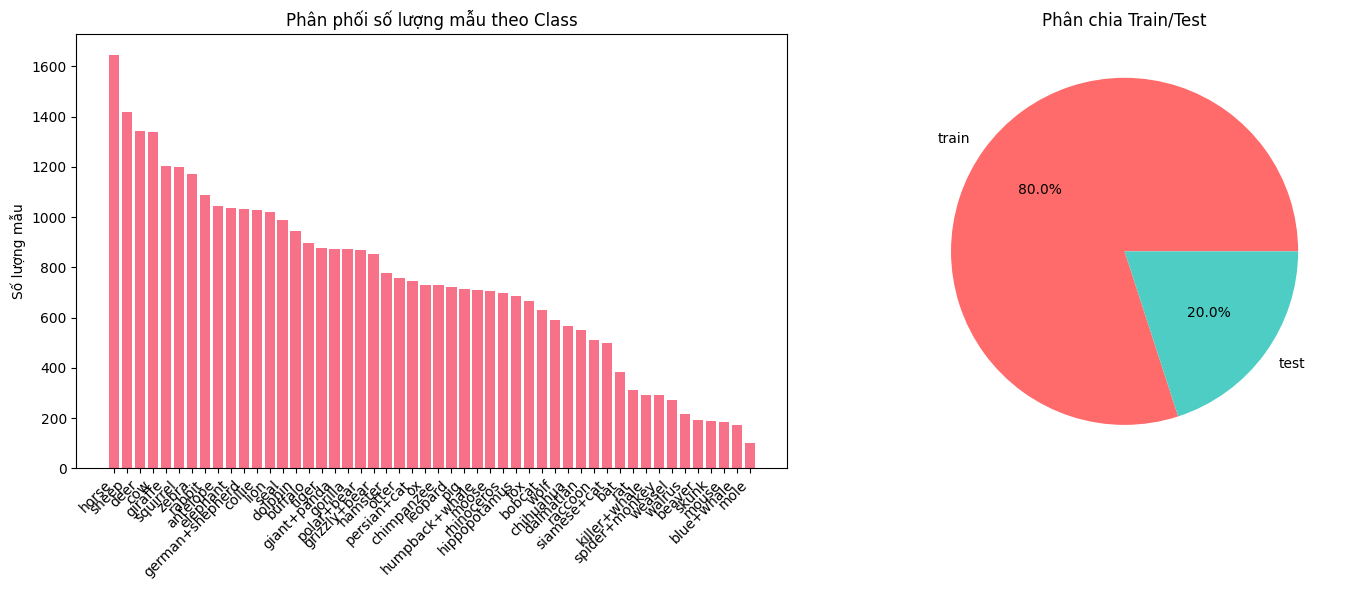


3. PHÂN TÍCH PCA:


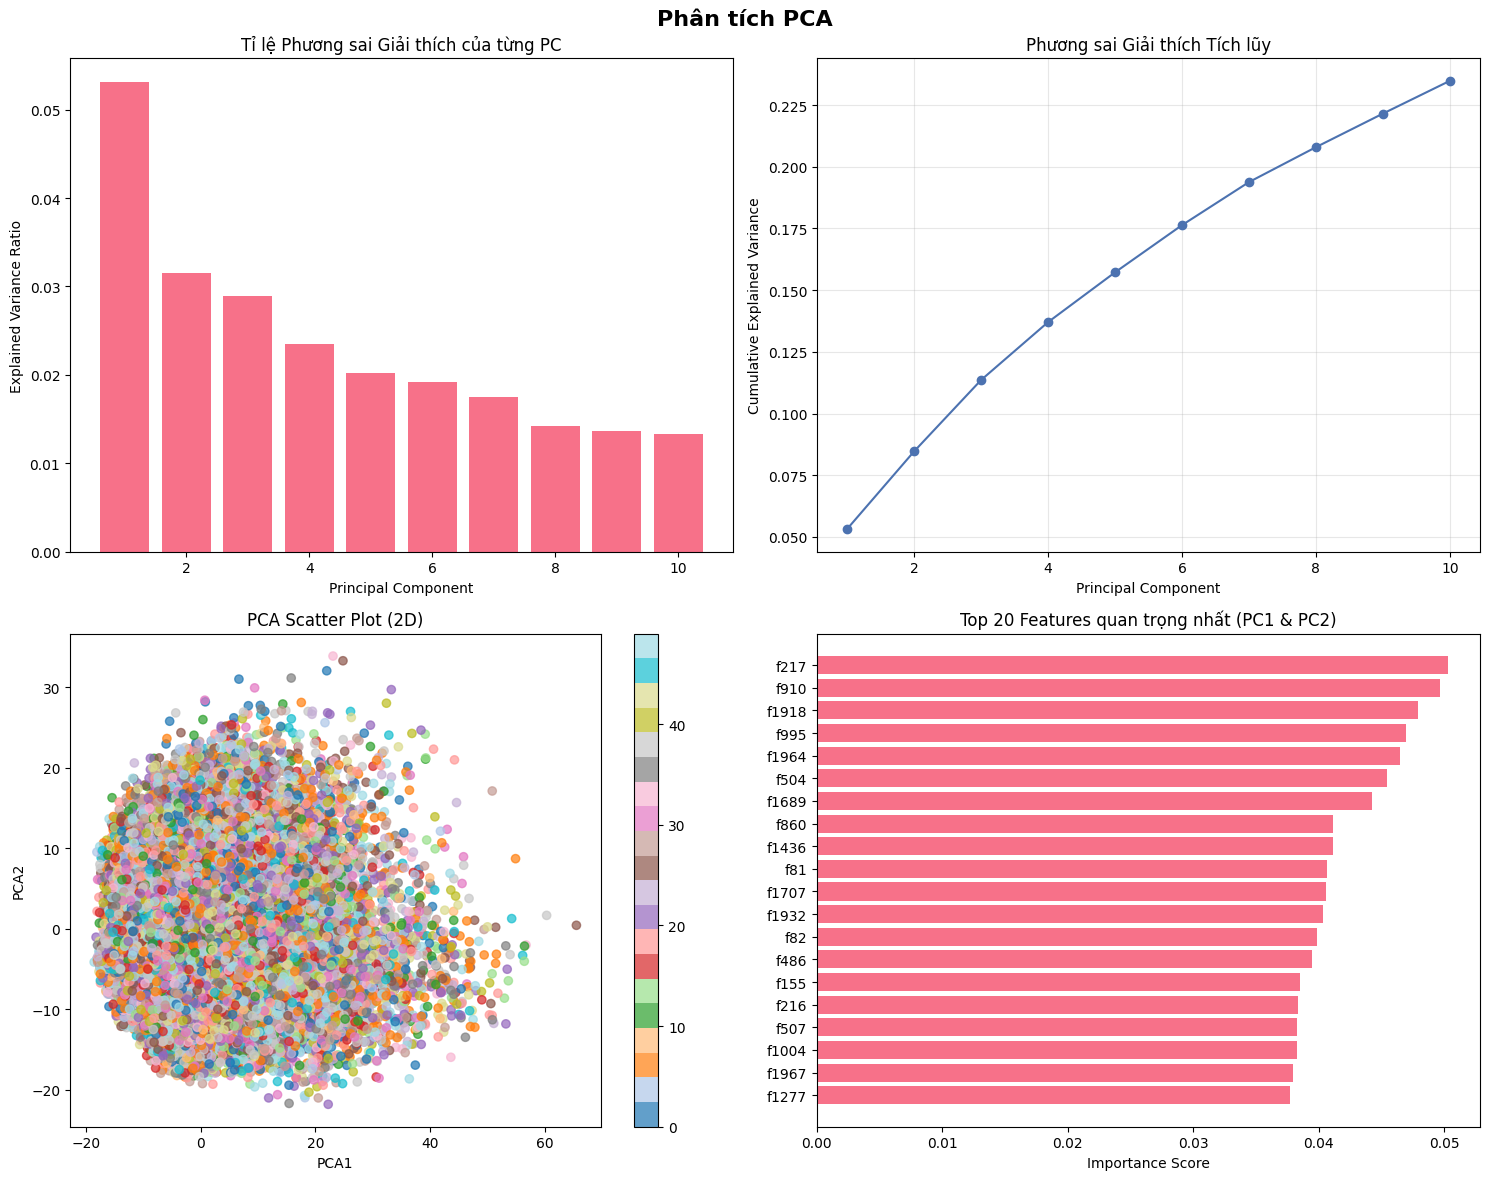


4. TRỰC QUAN HÓA TƯƠNG TÁC:
   Đang tạo PCA plot...


   Đang tạo t-SNE plot...
Đang chạy t-SNE... (có thể mất vài phút)


   Đang tạo UMAP plot...
Đang chạy UMAP...



5. PHÂN TÍCH FEATURES:


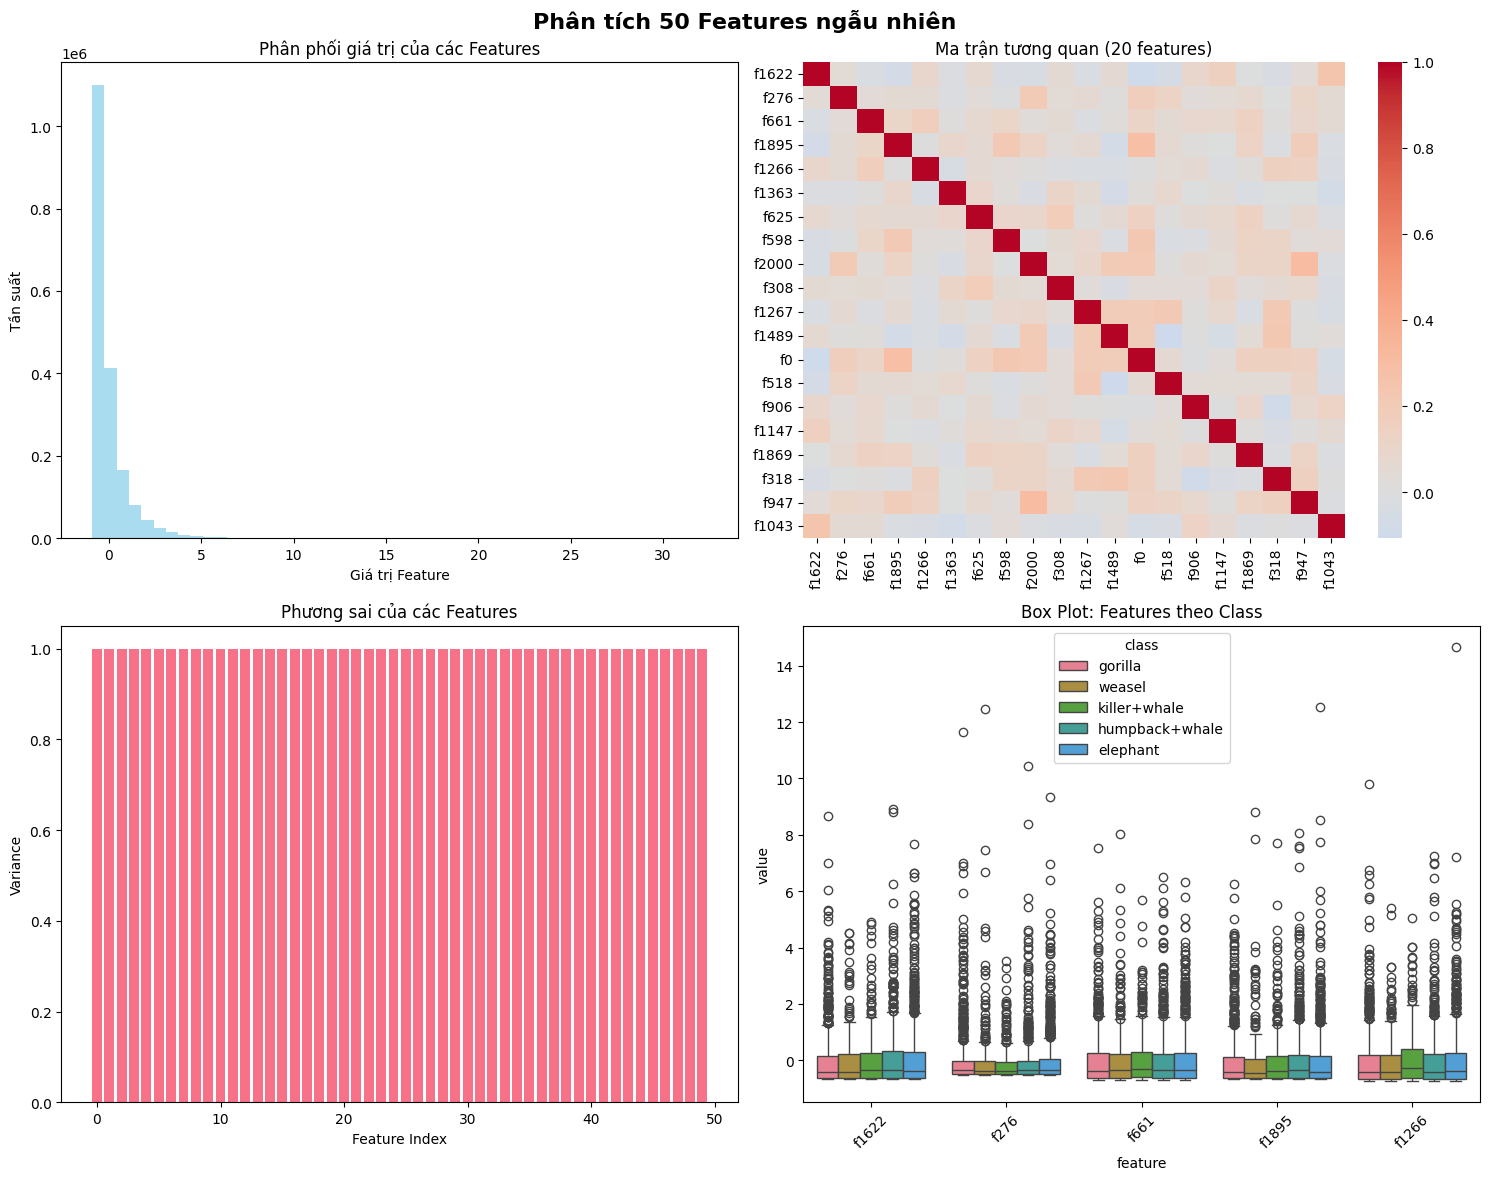


=== HOÀN THÀNH DASHBOARD ===


In [18]:

viz_tool = DataVisualizationTool(df)
viz_tool.create_comprehensive_dashboard()

##1. THỐNG KÊ CƠ BẢN
Số lượng đặc trưng (features): 2,048 chiều từ ResNet101.

Số lượng mẫu (samples): 37,322 ảnh động vật.

Số lớp (classes): 50 loài động vật.

- Ý nghĩa: Bộ dữ liệu có quy mô lớn, đa dạng lớp, dữ liệu có chiều cao nên cần giảm chiều và chuẩn hóa trước huấn luyện.
##2. PHÂN PHỐI CLASS VÀ TẬP DỮ LIỆU

**Biểu đồ 1: Phân phối số lượng mẫu theo class**

- Có sự mất cân bằng đáng kể giữa các lớp.

- Lớp như horse, ox, deer có >1000 ảnh, lớp như mole, blue-whale chỉ có ~200 ảnh.

→ Cần xử lý mất cân bằng: sử dụng class_weight, oversampling, hoặc kỹ thuật nâng cao như focal loss.

**Biểu đồ 2: Phân chia Train/Test**

- Tỷ lệ 80% (train) – 20% (test) là hợp lý.

- Không có dấu hiệu chia lệch tập gây overfitting.

→ Đảm bảo đánh giá mô hình công bằng và tổng quát hóa tốt.

##3. PHÂN TÍCH PCA (GIẢM CHIỀU)

**Biểu đồ 3: Tỉ lệ phương sai giải thích từng thành phần**
- PC1 chỉ giữ 5.5% thông tin, 10 PCs giữ tổng cộng ~22.8%.

- Phân phối thông tin rất phân tán.

→ PCA không phù hợp để giảm xuống chỉ vài chiều → chỉ nên dùng để trực quan hóa, không nên thay thế toàn bộ đặc trưng khi huấn luyện.

**Biểu đồ 4: Phương sai giải thích tích lũy**
- Cho thấy mức độ cộng dồn thông tin theo từng PC.

- 10 PCs vẫn chưa đạt 25% → cần giữ số lượng PCs lớn hơn nếu dùng cho huấn luyện.

**Biểu đồ 5: PCA Scatter Plot (2D)**
- Dữ liệu giữa các lớp bị chồng lấn nhiều trên không gian PCA1–PCA2.

- Không có sự tách biệt lớp rõ ràng trong không gian tuyến tính.

→ Cần dùng mô hình phi tuyến (CNN, Random Forest, Deep Learning) để phân biệt lớp tốt hơn.

**Biểu đồ 6: Top 20 features quan trọng nhất theo PC1 và PC2**
- Các đặc trưng như f217, f910, f995, f504 có mức ảnh hưởng cao nhất.

→ Có thể dùng top feature để xây dựng mô hình nhẹ, kiểm tra độ chính xác thử nghiệm, hoặc phục vụ cho phân tích giải thích mô hình.

##4. TRỰC QUAN HÓA TƯƠNG TÁC

**Biểu đồ 7: PCA Interactive Scatter Plot**
- Các lớp chồng lấn mạnh trên không gian tuyến tính PCA.

- Không tách lớp hiệu quả ➝ PCA không phù hợp để phân loại trực tiếp.

**Biểu đồ 8: t-SNE Interactive Visualization**
- Dữ liệu tạo thành các cụm rời rạc rõ hơn PCA.

- Hiển thị mối quan hệ phi tuyến giữa các lớp hiệu quả.

→ Thích hợp dùng t-SNE để trực quan hóa lớp và phát hiện dữ liệu bất thường.

**Biểu đồ 9: UMAP Interactive Visualization**
- Cụm dữ liệu rõ ràng, tách biệt hơn PCA và t-SNE.

- Một số lớp có thể phân biệt được rõ nét.

→ UMAP cho trực quan hóa tốt nhất → gợi ý dùng cho khám phá cấu trúc và giảm chiều trước mô hình hóa.

##5. PHÂN TÍCH FEATURES (ĐẶC TRƯNG)

**Biểu đồ 10: Phân phối giá trị feature (Histogram)**
- Feature từ mô hình CNN có xu hướng sparse, lệch phải.

→ Cân nhắc dùng normalization mạnh như RobustScaler hoặc xử lý zero-inflated features.

**Biểu đồ 11: Ma trận tương quan 20 features**
- Phần lớn feature có tương quan thấp → thông tin đa chiều.

→ Dữ liệu không dư thừa → giữ lại toàn bộ feature vẫn hiệu quả.

**Biểu đồ 12: Phương sai của 50 feature ngẫu nhiên**
- Sau chuẩn hóa, tất cả có phương sai ~1.

→ Thỏa điều kiện cho các mô hình như PCA, SVM, Logistic Regression.

**Biểu đồ : Boxplot các feature theo class**
- Một số feature có khả năng phân biệt nhẹ giữa các lớp, tuy không quá rõ.

→ Có thể dùng cho phân tích giải thích mô hình, hoặc mô hình tuyến tính đơn giản.